# Tutorial de Pandas

Ejecutar este documento en forma dinámica: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/gmg-utn/compTools/master?filepath=pandas/pandas.ipynb)

pandas es una biblioteca de código abierto, con [licencia BSD](https://es.wikipedia.org/wiki/Licencia_BSD), que provee estructuras de datos y herramientas de análisis de alto desempeño y fáciles de usar, para el lenguaje de programación Python.

De [Wikipedia](https://en.wikipedia.org/wiki/Pandas_(software)):

> El nombre se deriva de "panel data", un término usual en econometría para conjuntos de datos 
> que incluye observaciones sobre múltiples períodos de tiempo para los mismos individuos.

## ¿Para qué sirve pandas?

pandas es, principalmente, un contenedor de datos que permite explorarlos, limpiarlos, transformarlos y analizarlos.

Por ejemplo, podemos querer explorar datos almacenados en un archivo [CSV](https://es.wikipedia.org/wiki/Valores_separados_por_comas). pandas puede extraer esa información y almacenarla en un **dataset** (que es básicamente una tabla), y luego realizar tareas como:

- Calcular estadísticas y responder cuestiones sobre los datos, como:
    - ¿Cuál es la media, mediana, máximo, mínimo de cada columna?
    - ¿Hay correlación entre la columna A y la columna B?
    - ¿Qué aspecto tiene la distribución de datos de la columna C?

- Limpieza de datos (remover valores perdidos, filtrado de filas o columnas con algún criterio)

- Visualización de los datos con ayuda de Matplotlib o Seaborn. Se pueden graficar barras, líneas, histogramas, burbujas y más.

- Almacenar los datos limpios y transformados en un nuevo CSV, otro archivo o una base de datos.

pandas está construido sobre el paquete NumPy, por lo que mucho de la estructura de NumPy se utiliza o se replica en pandas. Los datos en pandas se usan frecuentemente para análisis estadístico en SciPy, para graficar funciones con Matplotlib o Seaborn, y para algoritmos de *machine learning* en Scikit-learn.


## Aumento de popularidad de pandas

![popularidad](https://s3.us-east-1.amazonaws.com/qz-production-atlas-assets/charts/atlas_rJ9sZ5syf@2x.png)

## Instalación e importación

Para instalar pandas en Linux, simplemente hay que abrir una terminal, tener permisos de *root*, y poner:

```
apt install python3-pandas
```

Para importar pandas en un script, usualmente se lo utiliza con:

In [1]:
import pandas as pd

## Componentes principales de pandas: Series y DataFrames

Los dos componentes primarios de pandas son las `Series` y los `DataFrame`.

Una `Series` es esencialmente una columna, y un `DataFrame` es una tabla mutidimensional construida a partir de una colección de `Series`.

![Series y DataFrame](fig1.png)

DataFrames y Series son muy similares, dado que muchas operaciones que se pueden hacer con una se pueden hacer con las otras, tal como llenarlas con valores y calcular la media.

Veremos a continuación cómo crear Series y DataFrames, y luego cómo operar con ellas.

## Creación de DataFrames desde cero

Crear DataFrames desde Python es útil cuando queremos organizar datos generados desde el mismo programa, en vez de importar los datos desde un archivo externo (que veremos en breve).

Hay muchas formas de crear un DataFrame desde cero, pero tal vez la más simple sea hacerlo usando un diccionario.

Supongamos que tenemos una veterinaria que administra turnos para atender gatos y perros. Queremos tener una columna para cada especie y filas para cada día. Para organizar esta información como un diccionario podemos hacer:

In [2]:
data = {'Perros': [4, 1, 0, 2],
        'Gatos': [2, 0, 7, 3]}

Podemos entonces pasar este diccionario al constructor de DataFrames en pandas:

In [3]:
turnos = pd.DataFrame(data)
turnos

,Perros,Gatos
0,4,2
1,1,0
2,0,7
3,2,3


Cada par `(clave, valor)` en `data` corresponde a una **columna** en el DataFrame resultante.

El **índice** en este DataFrame fue creado automáticamente con los números `0...3`, pero podemos crear nuestros propios índices cuando inicializamos el DataFrame.

Por ejemplo, podemos poner días de la semana como índices:

In [4]:
turnos = pd.DataFrame(data, index=['Lunes', 'Martes', 'Miércoles', 'Jueves'])
turnos

,Perros,Gatos
Lunes,4,2
Martes,1,0
Miércoles,0,7
Jueves,2,3


Entonces, podemos **loc**alizar los turnos de un día usando su nombre:

In [5]:
turnos.loc['Jueves']

Perros    2
Gatos     3
Name: Jueves, dtype: int64

Veremos más sobre cómo localizar y extraer datos de un DataFrame, pero ahora ya sabemos cómo crear y llenar con datos aleatorios un DataFrame para aprender.

## Lectura de datos desde archivos

Es muy simple importar datos a un DataFrame a partir de un archivo [CSV](https://es.wikipedia.org/wiki/Valores_separados_por_comas). Se realiza esta operación con una sola línea:

In [6]:
df = pd.read_csv('turnos.csv')
df

,Unnamed: 0,Perros,Gatos
0,Lunes,4,3
1,Martes,1,0
2,Miércoles,0,7
3,Jueves,2,3
4,Viernes,5,4
5,Sábado,8,6


Los archivos CSV no tienen índices como los DataFrames, por lo que es necesario establecer el `index_col` cuando importamos los datos:

In [7]:
df = pd.read_csv('turnos.csv', index_col=0)
df

,Perros,Gatos
Lunes,4,3
Martes,1,0
Miércoles,0,7
Jueves,2,3
Viernes,5,4
Sábado,8,6


Es posible importar datos desde archivos con otras estructuras mas complejas que los CSV, como JSON o SQL, pero no nos ocuparemos de esos archivos aquí.

## Principales operaciones en DataFrames

Las DataFrames poseen cientos de métodos y otras operaciones que son útiles para realizar análisis de los datos. Veremos a continuación las operaciones que sirven para realizar transformaciones simples de los datos y aquéllas que proveen análisis estadísticos sencillos.

Comenzaremos importando datos de las mil películas mas populares en el intervalo 2006-2016:

In [8]:
movies_df = pd.read_csv('IMDB-Movie-Data.csv', index_col='Title')

### Exploración de los datos

La primera acción a realizar cuando importamos un nuevo conjunto de datos es imprimir unas pocas filas para tener una referencia visual. Podemos hacer esto con el método `head()`:

In [9]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


`.head()` muestra por defecto las últimas cinco filas del DataFrame. Es posible modificar este número pasándole como argumento un entero: `movies_df.head(10)` mostrará las primeras 10 filas del DataFrame.

Para ver las últimas cinco filas podemos usar el método `.tail()`, que también acepta un entero como argumento. Por ejemplo, si queremos ver las últimas dos filas del DataFrame, podemos usar:

In [10]:
movies_df.tail(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


Es importante, al importar un conjunto de datos, visualizar las primeras filas para inspeccionar los nombres de las columnas, el índice, y ejemplos de valores en cada fila.

Puede observarse que el índice en el DataFrame es la columna  *Title*, que aparece más abajo que el resto de las cabeceras de las demás columnas.

### Información sobre los datos

Uno de los primeros métodos que se usan regularmente sobre los DataFrames luego de importar los datos es `.info()`:

In [11]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
Rank                  1000 non-null int64
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


`.info()` provee los detalles esenciales del conjunto de datos, tal como el número de filas y columnas, el número de valores no nulos, el tipo de dato en cada columna y cuanta memoria es utilizada por el DataFrame.

Otro atributo útil y rápido es `.shape`, que devuelve una tupla de (filas, columnas):

In [12]:
movies_df.shape

(1000, 11)

Es frecuente utilizar `.shape` cuando se limpian o transforman los datos. Por ejemplo, podríamos filtrar algunas filas según un criterio dado y luego querer saber cuántas filas fueron removidas.

### Manipulación de duplicados

Este DataFrame no tiene filas duplicadas, pero siempre es importante verificar que no estamos agregando filas duplicadas.

Para demostrar esto, vamos a duplicar las películas en el DataFrame agregándolo a si mismo:

In [13]:
temp_df = movies_df.append(movies_df)
temp_df.shape

(2000, 11)

`.append()` devuelve una copia sin afectar el DataFrame original. Estamos asignando esta copia en `temp_df` de modo de no trabajar con los datos originales.

Notar que `.shape` muestra rápidamente que las filas del DataFrame se duplicaron. Podemos ahora eliminar las filas duplicadas:

In [14]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(1000, 11)

Al igual que `.append()`, `.drop_duplicates()` también devuelve una copia del DataFrame, pero con las filas duplicadas removidas. Invocando `.shape` confirmamos que volvemos a las mil filas de nuestros datos originales.

Resulta redundante asignar DataFrames a la misma variable como en este ejemplo. Por esta razón, pandas tiene el agrumento con nombre `inplace` en muchos de sus métodos. Utilizando `inplace=True` se modificará el objeto DataFrame mismo:

In [15]:
temp_df.drop_duplicates(inplace=True)

Otro argumento importante de `.drop_duplicates()` es `keep`, que tiene tres opciones posibles:

- `first`: Elimina duplicados excepto la primera ocurrencia (por defecto).
- `last`: Elimina duplicados excepto la última ocurrencia.
- `False`: Elimina todos los duplicados.

Dado que no definimos el argumento `keep` en el ejemplo, por defecto usa `first`. Esto significa que si dos filas son iguales, pandas eliminará la segunda y mantendrá la primera. Usando `last` se obtiene el efecto opuesto: se elimina la primer fila.

Por otra parte, `False` eliminará todos los duplicados. Si dos filas son iguales se eliminarán ambas. Por ejemplo:

In [16]:
temp_df = movies_df.append(movies_df)
temp_df.shape
temp_df.drop_duplicates(inplace=True, keep=False)
temp_df.shape

(0, 11)

### Limpieza de columnas

Muchos conjuntos de datos tienen nombres de columnas con símbolos, palabras en mayúsculas y minúsculas, espacios y errores tipográficos. Para seleccionar datos por columna de una forma más simple, es posible perder un poco de tiempo limpiando sus nombres.

Para obtener los nombres de las columnas del DataFrame podemos usar `.columns`:

In [17]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

`.columns` es útil para renombrar columnas usando simplemente copiar y pegar, pero también es útil para entender por qué obtenemos un `Key error` cuando seleccionamos datos por columna.

Podemos usar `.rename()` para cambiar alguna o todas las columnas mediante un diccionario. Por ejemplo, si queremos eliminar los paréntesis, podemos usar:

In [18]:
movies_df.rename(columns={
    'Runtime (Minutes)':'Runtime',
    'Revenue (Millions)': 'Revenue_millions'
}, inplace=True)
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

En caso que necesitemos tener en minúsculas todos los nombres de las columnas, podemos combinar `.columns` con comprensiones de listas:

In [19]:
movies_df.columns = [name.lower() for name in movies_df.columns]
movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

Las comprensiones de listas (y de diccionarios) son muy útiles para trabajar con pandas y datos. Suele ser una buena idea pasar los nombres de columnas a minúsculas, remover caracteres especiales, y reemplazar espacios con guiones bajos, si es necesario trabajar con un DataFrame por un tiempo.

### Cómo trabajar con valores perdidos

Al explorar los datos es probable encontrar que faltan algunos valores o son *null*. Lo más frecuente de ver son los `None` de Python o los `np.nan` de NumPy, cada uno de los cuales son manipulados en forma diferente en algunas situaciones.

Hay dos opciones para resolver los *nulls*:

1. Eliminar las filas o columnas con *nulls*.
2. Reemplazar *nulls* con valores no-*null*, una técnica conocida como **imputación**.

Veamos el número total de *nulls* en nuestro conjunto de datos. El primer paso es verificar cuántas celdas en nuestro DataFrame son *null*:

In [20]:
movies_df.isnull()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
The Great Wall,False,False,False,False,False,False,False,False,False,False,False
La La Land,False,False,False,False,False,False,False,False,False,False,False
Mindhorn,False,False,False,False,False,False,False,False,False,True,False
The Lost City of Z,False,False,False,False,False,False,False,False,False,False,False


Vemos que `.isnull()` devuelve un DataFrame donde cada celda es `True` o `False` dependiendo si la celda contiene un valor *null*.

Para contar el número de *nulls* en cada columna, usamos una función de reducción que suma:

In [21]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

`.isnull()` no es muy útil por si mismo, sino que suele utilizarse combinado con otros métodos como `.sum()`.

Vemos que nuestros datos tienen 128 valores perdidos para `revenue_millions`, y 64 para `metascores`.

#### Eliminando valores *null*

Los analistas suelen enfrentarse regularmente al dilema de eliminar o imputar los valores *null*, y es una decisión que requiere un conociemiento profundo de los datos y su contexto. Por lo general, remover los datos *null* se recomienda solo cuando tenemos un número pequeño de datos perdidos.

Eliminar los *nulls* es muy simple:

In [22]:
movies_df.dropna()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
Passengers,10,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


Esta operación elminará toda **fila** que tenga al menos un valor *null*, pero devolverá un DataFrame sin alterar el original. Puede especificarse `inplace=True` si se quiere modificar los datos originales.

En este caso, se eliminaron 1280 filas donde `revenue_millions` es *null* y 64 filas donde `metascore` es *null*. Esto suele ser inconveniente pues existen datos valiosos en otras columnas de las filas eliminadas.

Además de eliminar filas, se pueden eliminar las columnas que contienen valores *null*, estableciendo `axis=1`:

In [23]:
movies_df.dropna(axis=1)

,rank,genre,description,director,actors,year,runtime,rating,votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188


En nuestro conjunto de datos se eliminaron de esta forma las columnas `revenue_millions` y `metascore`.

#### Imputación

Imputación es una técnica utilizada para mantener los datos valiosos que tienen algunos valores *null*. Puede haber oportunidades en que eliminar toda una fila o columna que tiene un valor *null* borra una gran cantidad de datos del DataFrame, por lo tanto es posible imputar el valor *null* con otro valor, usualmente la **media** o la **mediana** de la columna en cuestión.

Veamos cómo imputar los valores perdidos de la columna `revenue_millions`. Primero extraemos esa columna en una variable:

In [24]:
retorno = movies_df['revenue_millions']

El uso de corchetes es la forma usual de seleccionar columnas en un DataFrame.

Ahora, `retorno` contiene una `Series`:

In [25]:
retorno.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

El formato es un poco diferente al de un DataFrame, pero se mantiene el índice con `Title`.

Vamos a imputar los valores perdidos utilizando la media de la columna:

In [26]:
retorno_media = retorno.mean()
retorno_media

82.95637614678898

Con el valor obtenido, vamos a reemplazar los *nulls* utilizando `.fillna()`:

In [27]:
retorno.fillna(retorno_media, inplace=True)

Ahora hemos reemplazado todos los *nulls* en `retorno` con la media de la columna. Notar que utilizando `inplace=True` hemos efectivamente modificado el `movies_df` original:

In [28]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

Imputar una columna completa con el mismo valor puede no ser lo más conveniente. Una mejor idea es intentar una imputación más granular por `Genre` o `Director`.

Por ejemplo, podríamos encontrar la media del retorno generado en cada género individualmente e imputar los *nulls* en cada género con la media correspondiente.

### Analizando las variables

Utilizando `.describe()` en un DataFrame podemos obtener un resumen de la distribución de las variables numéricas:

In [29]:
movies_df.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Comprender qué variables son numéricas ayuda a pensar la forma en que conviene representar gráficamente los datos.

`.describe()` también puede usarse con variables categóricas para obtener el conteo de filas, el conteo único de categorías, la categoría más utilizada y su frecuencia:

In [30]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

Esto nos dice que la columna `genre` tiene 207 valores únicos, la que más aparece es Action/Adventure/Sci-Fi, que aparece 50 veces (`freq`).

`.value_counts()` devuelve la frecuencia de todos los valores en una columna:

In [31]:
movies_df['genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Comedy,Drama                  27
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: genre, dtype: int64

### Relaciones entre variables numéricas

Utilizando el método de correlación `.corr()` podemos estimar la relación entre cada par de variables numéricas:

In [32]:
movies_df.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


Las tablas de correlación son una representación numérica de las relaciones bivariadas en el conjunto de datos.

Los números positivos indican una correlación positiva (si una variable crece, la otra también), y los negativos representan una correlación inversa (si una variable crece, la otra decrece). Un valor de 1.0 indica una correlación perfecta.

Entonces, observando la primer fila vemos que `rank` tiene una correlación perfecta con ella misma, lo que es obvio. Por otra parte, la correlación entre `votes` y `revenue_millions` es de 0.6, lo que resulta interesante.

Examinar relaciones bivariadas es útil cuando tenemos una variable dependiente en mente y queremos ver cuáles son los factores más correlacionados con el incremento o decremento de esa variable. Es posible representar gráficamente relaciones bivariadas con gráficos de puntos, como veremos más adelante).

### Rebanado, selección y extracción

Es importante notar que, aunque muchos métodos de pandas son similares, las `DataFrame` y las `Series` tienen atributos diferentes, por lo que es necesario saber qué tipo de dato estamos manipulando para evitar errores.

#### Extracción por columna

Hemos visto que para extraer una columna se utilizan corchetes:

In [33]:
genero = movies_df['genre']
type(genero)

pandas.core.series.Series

Esta operación devuelve un objeto de tipo `Series`. Para extraer una columna como un `DataFrame` es necesario pasar una lista de nombres de columnas (aunque sea una sola):

In [34]:
genero = movies_df[['genre']]
type(genero)

pandas.core.frame.DataFrame

Dado que es solo una lista, es simple extraer más de una columna:

In [35]:
subset = movies_df[['genre', 'rating']]
subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


#### Extracción por fila

Para extraer datos de una `DataFrame` por fila disponemos de dos opciones:

- `.loc`: **loc**aliza por nombre.
- `.iloc`: **loc**aliza por índice numérico.

Recordemos que aún tenemos nuestros datos indexados por el título de la película, por lo que podemos usar `.loc` para extraer los datos de un título:

In [36]:
prom = movies_df.loc['Prometheus']
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

Por otro lado, podemos utilizar `.iloc` para obtener Prometheus por su índice numérico:

In [37]:
prom = movies_df.iloc[1]
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

`.loc` e `.iloc` pueden pensarse como similares al rebanado de listas en Python, lo que nos permite seleccionar múltiples filas:

In [38]:
movie_subset = movies_df.loc['Prometheus':'Sing']
movie_subset = movies_df.iloc[1:4]
movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


Una distinción importante entre `.loc` y `.iloc` al seleccionar múltiples filas es que `.loc` incluye la película *Sing* en el resultado, pero cuando utilizamos `.iloc` obtenemos las filas 1:4, pero la película con índice 4 (*Suicide Squad*) no está incluida.

El rebanado con `.iloc` sigue las mismas reglas que el rebanado de listas, el objeto al final del rango establecido no está incluido.

#### Selecciones condicionales

Hasta ahora hemos visto como seleccionar filas y columnas, pero us usual la necesidad de extraer información por medio de selecciones condicionales.

Por ejemplo, podríamos querer filtrar nuestras películas en el DataFrame para mostrar solo las dirigidas por Ridley Scott, o las que tienen un *rating* mayor o igual a 8.0.

Para esto, tomamos una columna del DataFrame y aplicamos una condición booleana sobre ella:

In [39]:
condition = (movies_df['director'] == 'Ridley Scott')
condition.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: director, dtype: bool

En forma similar a `.isnull()`, esta operación devuelve una `Series` con `True` o `False`: `True` para películas dirigidas por Ridley Scott y `False` para las que no fueron dirigidas por el.

Procedemos entonces a filtrar todas las películas no dirigidas por Ridley Scott. En otras palabras, no queremos las películas con `False`. Para devolver las filas con la condición `True` tenemos que pasar esta operación al DataFrame:

In [40]:
movies_df[movies_df['director'] == 'Ridley Scott']

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


Podemos realizar selecciones condicionales utilizando valores numéricos filtrando el DataFrame por ratings:

In [41]:
movies_df[movies_df['rating'] >= 8.6].head(3)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Podemos realizar selecciones condicionales más complejas por medio de operadores lógicos `|` para "or" y `&` para "and". Por ejemplo, podemos filtrar las películas dirigidas por Ridley Scott y con rating $\geq$ 7.0:

In [42]:
movies_df[(movies_df['director'] == 'Ridley Scott') & (movies_df['rating'] >= 7.0)]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


Es necesario asegurarse de agrupar las evaluaciones entre paréntesis de modo que Python sepa como evaluar la expresión condicional.

En algunos casos se pueden hacer selecciones más concisas utilizando métodos de listas. Por ejemplo, si queremos seleccionar películas dirigidas por Ridley Scott y Christopher Nolan, podemos hacerlo así:

In [43]:
movies_df[movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Supongamos que queremos seleccionar todas las películas estrenadas entre 2005 y 2010, que tienen un rating por encima de 8.0, pero que generaron ingresos por debajo del percentilo del 25%:

In [44]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


Si recordamos cuando usamos el método `.describe()`, el percentilo 25 para los ingresos estaba en alrededor de 17.4, podemos acceder a este valor directamente utilizando el método `.quantile()` con un `float` de 0.25.

### Aplicación de funciones

Es posible iterar sobre un DataFrame o una Series de la misma forma que se recorre una lista en Python, pero hacerlo de ese modo (especialmente en conjuntos de datos grandes) es lento.

Una alternativa eficiente es utilizar el método `.apply()` con una función sobre un *dataset*. Por ejemplo, utilizaremos esta forma para clasificar las películas con rating 8.0 o más como 'Buena' y 'Mala' en otro caso. Primero definimos la función:

In [45]:
def rating_function(x):
    return ('Buena' if x >= 8.0 else 'Mala')

Ahora vamos a aplicar esta función a toda la columna de ratings, generando una nueva columna que guarda este resultado:

In [47]:
movies_df['categoria'] = movies_df['rating'].apply(rating_function)
movies_df.head(3)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,categoria
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Buena
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Mala
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Mala


El método `.apply()` pasa cada valor de la columna `rating` como argumento de la función `rating_function`, y como resultado devuelve una nueva `Series`. Esta `Series` se asigna entonces como una nueva columna del DataFrame `movies_df`.

También es posible pasar funciones anónimas al método `.apply()`. La función lambda siguiente realiza la misma tarea que `rating_function()`:

In [51]:
movies_df['categoria'] = movies_df['rating'].apply(lambda x: 'Buena' if x >= 8.0 else 'Mala')
movies_df.head(3)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,categoria
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Buena
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Mala
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Mala


Dado que pandas está construido sobre NumPy, el uso de `.apply()` es mucho más rápido que la iteración manual debido a la utilización de la vectorización propia de la [programación orientada a *arrays*](https://en.wikipedia.org/wiki/Array_programming).

## Gráficos básicos

pandas se integra fácilmente con [Matplotlib](https://matplotlib.org/), lo que permite realizar gráficos en forma inmediata. También es muy simple realizar gráficos con [seaborn](https://seaborn.pydata.org/). Se puede ver una introducción a la visualización de datos [aquí](https://nbviewer.jupyter.org/github/gmg-utn/compTools/blob/master/visualizacion/visualizacion.ipynb).

Para comenzar a ver algunos ejemplos, es necesario primero importar matplotlib:

In [56]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # configura el tamaño del gráfico y las letras

**Recomendación:**

- Para analizar variables categóricas es conveniente utilizar gráficos de barras y de cajas (*boxplots*).
- Para analizar variables numéricas es útil utilizar histogramas, gráficos de puntos, de líneas y *boxplots*.

Vamos a graficar la relación entre ratings e ingresos. Lo que haremos sera aplicar el método `.plot()` sobre nuestro *dataset* con alguna información sobre cómo construir el gráfico:

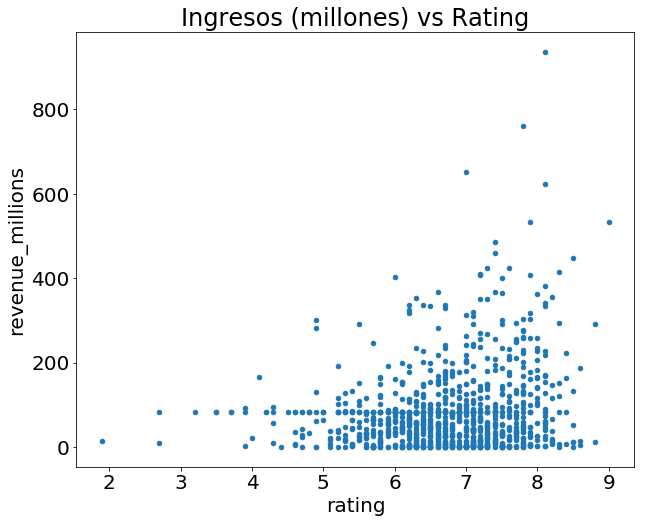

In [59]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Ingresos (millones) vs Rating');

Si queremos examinar la distribución de valores de una sola columna, es útil graficar un histograma:

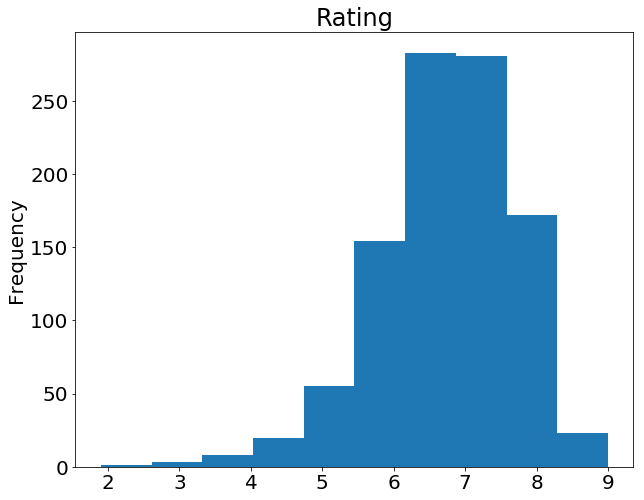

In [60]:
movies_df['rating'].plot(kind='hist', title='Rating');

Otra representación útil es la que se genera con un *boxplot*. Parte de la información que se muestra en este tipo de gráfico se obtiene con el método `.describe()`:

In [62]:
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

Utilizando un *boxplot* podemos visualizar estos datos:

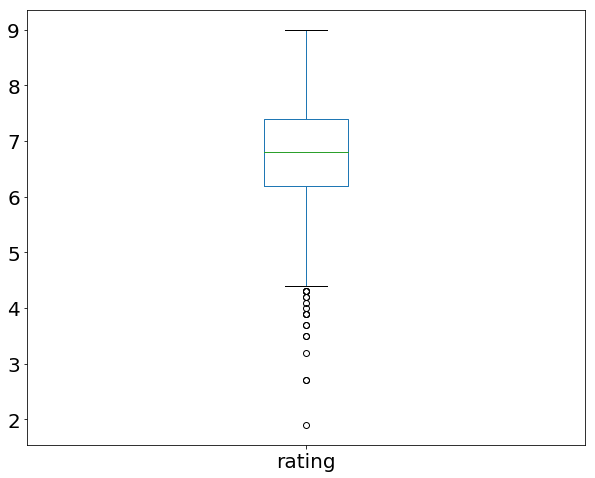

In [64]:
movies_df['rating'].plot(kind='box');

Es posible combinar datos numéricos con categóricos. Por ejemplo, podemos analizar la distribución de ingresos según nuestra calificación de películas:

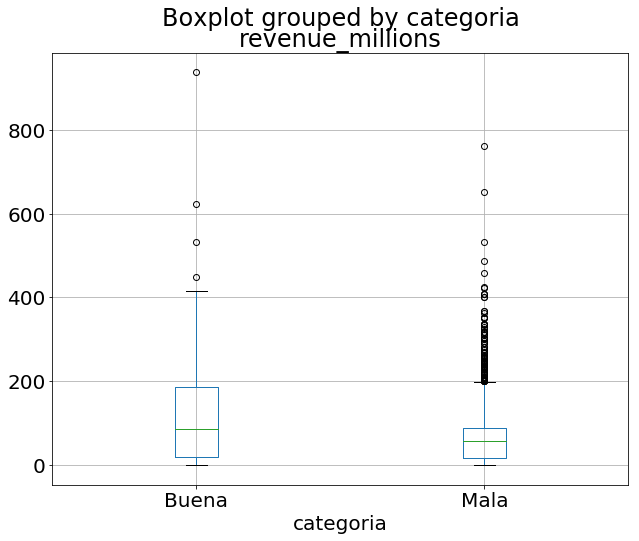

In [66]:
movies_df.boxplot(column='revenue_millions', by='categoria');

## Resumen

pandas provee un entorno muy eficiente para la organización de datos, su exploración, limpieza, procesamiento y visualización. 

## Referencias:

1. [Python Pandas Tutorial: A Complete Introduction for Beginners](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)
2. [Tutoriales de la documentación oficial](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
